In [157]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

In [158]:
train = pd.read_csv("./dataset/train.csv") 

In [159]:
survived_train = train['Survived']

In [160]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


ValueError: color kwarg must have one color per dataset

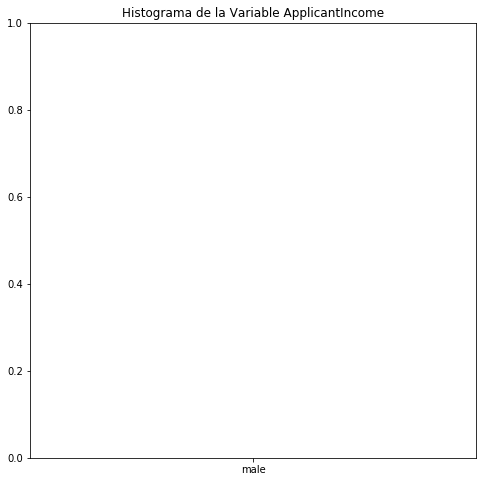

In [162]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable ApplicantIncome')
train['Sex'].hist(figsize=(8,8),color="blue",bins=100)
plt.ylim(0,140)

In [163]:
# Viendo las variables por tipo de datos
tipos = train.columns.to_series().groupby(train.dtypes).groups
tipos

{dtype('int64'): Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object'),
 dtype('float64'): Index(['Age', 'Fare'], dtype='object'),
 dtype('O'): Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')}

# Imputacion de la data

In [164]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
#train['Sex'] = train['Sex'].replace({'female': 1,'male': 2})
train.Sex.unique

<bound method Series.unique of 0      2
1      1
2      1
3      1
4      2
5      2
6      2
7      2
8      1
9      1
10     1
11     1
12     2
13     2
14     1
15     1
16     2
17     2
18     1
19     1
20     2
21     2
22     1
23     2
24     1
25     1
26     2
27     2
28     1
29     2
      ..
861    2
862    1
863    1
864    2
865    1
866    1
867    2
868    2
869    2
870    2
871    1
872    2
873    2
874    1
875    1
876    2
877    2
878    2
879    1
880    1
881    2
882    1
883    2
884    2
885    1
886    2
887    1
888    1
889    2
890    2
Name: Sex, Length: 891, dtype: int64>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

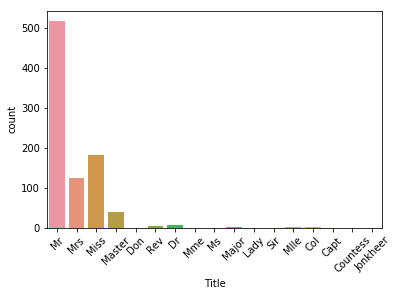

In [165]:
import re
# Extract Title from Name, store in column and plot barplot
train['Title'] = train.Name.apply(lambda x : re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x= 'Title', data=train)
plt.xticks(rotation=45)

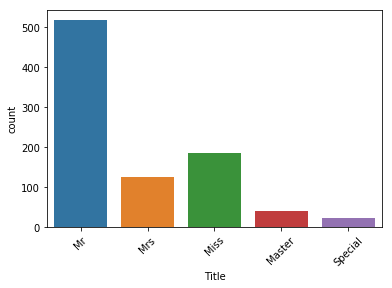

In [166]:
train['Title'] = train['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
train['Title'] = train['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=train);
plt.xticks(rotation=45);

In [167]:
# Did they have a Cabin?
train['Has_Cabin'] = ~train.Cabin.isnull()

# View head of data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


In [168]:
# Drop columns and view head
train.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,1,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,1,female,35.0,1,0,53.1000,S,Mrs,True
4,0,3,male,35.0,0,0,8.0500,S,Mr,False


In [169]:
test = pd.read_csv("./dataset/test.csv")

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,892,3,male,34.5,0,0,7.8292,Q,Mr,False
1,893,3,female,47.0,1,0,7.0000,S,Mrs,False
2,894,2,male,62.0,0,0,9.6875,Q,Mr,False
3,895,3,male,27.0,0,0,8.6625,S,Mr,False
4,896,3,female,22.0,1,1,12.2875,S,Mrs,False


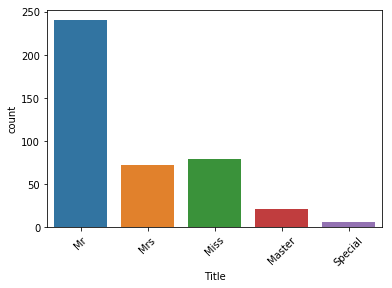

In [170]:
# Extract Title from Name, store in column and plot barplot
test['Title'] = test.Name.apply(lambda x : re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x= 'Title', data=test)
plt.xticks(rotation=45)

test['Title'] = test['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
test['Title'] = test['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=test);
plt.xticks(rotation=45);

# Did they have a Cabin?
test['Has_Cabin'] = ~test.Cabin.isnull()

# View head of data
test.head()

# Drop columns and view head
test.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
test.head()

In [171]:
test.head()  

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,892,3,male,34.5,0,0,7.8292,Q,Mr,False
1,893,3,female,47.0,1,0,7.0000,S,Mrs,False
2,894,2,male,62.0,0,0,9.6875,Q,Mr,False
3,895,3,male,27.0,0,0,8.6625,S,Mr,False
4,896,3,female,22.0,1,1,12.2875,S,Mrs,False


In [172]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Embarked']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['Age','Fare']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median()) 

In [173]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0))

Valores perdidos por columna
Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Title        0
Has_Cabin    0
dtype: int64


In [174]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [175]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
Has_Cabin       0
dtype: int64


In [176]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
test_parametrica=test.copy()
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Embarked']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['Age','Fare']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].median()) 

In [177]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Has_Cabin      0
dtype: int64


In [179]:
# Binning numerical columns
train_parametrica['CatAge'] = pd.qcut(train_parametrica.Age, q=4, labels=False )
train_parametrica['CatFare']= pd.qcut(train_parametrica.Fare, q=4, labels=False)
train_parametrica.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,CatAge,CatFare
0,0,3,male,22.0,1,0,7.2500,S,Mr,False,0,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,True,3,3
2,1,3,female,26.0,0,0,7.9250,S,Miss,False,1,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,True,2,3
4,0,3,male,35.0,0,0,8.0500,S,Mr,False,2,1


In [180]:
# Binning numerical columns
test_parametrica.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,892,3,male,34.5,0,0,7.8292,Q,Mr,False
1,893,3,female,47.0,1,0,7.0000,S,Mrs,False
2,894,2,male,62.0,0,0,9.6875,Q,Mr,False
3,895,3,male,27.0,0,0,8.6625,S,Mr,False
4,896,3,female,22.0,1,1,12.2875,S,Mrs,False


In [181]:
train_parametrica = train_parametrica.drop(['Age', 'Fare'], axis=1)
train_parametrica.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Has_Cabin,CatAge,CatFare
0,0,3,male,1,0,S,Mr,False,0,0
1,1,1,female,1,0,C,Mrs,True,3,3
2,1,3,female,0,0,S,Miss,False,1,1
3,1,1,female,1,0,S,Mrs,True,2,3
4,0,3,male,0,0,S,Mr,False,2,1


In [182]:
# Create column of number of Family members onboard
train_parametrica['Fam_Size'] = train_parametrica.Parch + train_parametrica.SibSp

In [183]:
# Drop columns
train_parametrica = train_parametrica.drop(['SibSp','Parch'], axis=1)
train_parametrica.head()

,Survived,Pclass,Sex,Embarked,Title,Has_Cabin,CatAge,CatFare,Fam_Size
0,0,3,male,S,Mr,False,0,0,1
1,1,1,female,C,Mrs,True,3,3,1
2,1,3,female,S,Miss,False,1,1,0
3,1,1,female,S,Mrs,True,2,3,1
4,0,3,male,S,Mr,False,2,1,0


In [184]:
# Binning numerical columns
test_parametrica['CatAge'] = pd.qcut(test_parametrica.Age, q=4, labels=False )
test_parametrica['CatFare']= pd.qcut(test_parametrica.Fare, q=4, labels=False)
test_parametrica.head()

test_parametrica = test_parametrica.drop(['Age', 'Fare'], axis=1)
test_parametrica.head()

# Create column of number of Family members onboard
test_parametrica['Fam_Size'] = test_parametrica.Parch + test_parametrica.SibSp

# Drop columns
test_parametrica = test_parametrica.drop(['SibSp','Parch'], axis=1)
test_parametrica.head()

,PassengerId,Pclass,Sex,Embarked,Title,Has_Cabin,CatAge,CatFare,Fam_Size
0,892,3,male,Q,Mr,False,2,0,0
1,893,3,female,S,Mrs,False,3,0,1
2,894,2,male,Q,Mr,False,3,1,0
3,895,3,male,S,Mr,False,1,1,0
4,896,3,female,S,Mrs,False,0,1,2


In [185]:
# Transform into binary variables
data_dum = pd.get_dummies(train_parametrica, drop_first=True)
data_dum.head()

# Transform into binary variables
data_dum_test = pd.get_dummies(test_parametrica, drop_first=True)
data_dum_test.head()

,PassengerId,Pclass,Has_Cabin,CatAge,CatFare,Fam_Size,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,892,3,False,2,0,0,1,1,0,0,1,0,0
1,893,3,False,3,0,1,0,0,1,0,0,1,0
2,894,2,False,3,1,0,1,1,0,0,1,0,0
3,895,3,False,1,1,0,1,0,1,0,1,0,0
4,896,3,False,0,1,2,0,0,1,0,0,1,0


In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_dum.drop('Survived', axis=1), data_dum['Survived'], test_size=0.30,
                                                   random_state=100)

In [188]:
# EL train y test lo concateno para poder mantener el mismo formato y codigo
train_parametrica = pd.concat([X_train, y_train], axis=1)

In [189]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train_parametrica.Survived.value_counts()

0    390
1    233
Name: Survived, dtype: int64

In [190]:
X, y = train_parametrica.drop('Survived', axis=1), train_parametrica['Survived']

In [191]:
!pip install imblearn
from imblearn.combine import SMOTETomek

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [192]:
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

In [193]:
train_parametrica.columns

Index(['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Special', 'Survived'],
      dtype='object')

In [194]:
# Tenemos identificados los nombres de las columnas para el dataframe
columns_X = ['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Special']
columns_y = ['Survived']

In [195]:
df_X_smt = pd.DataFrame(data=X_smt,columns=columns_X)
df_y_smt = pd.DataFrame(data=y_smt,columns=columns_y)

In [196]:
# Concatenamos la información
df_balanceado_smt = pd.concat([df_X_smt, df_y_smt], axis=1)

In [197]:
#df_balanceado_smt.head(3)
#df_balanceado_smt.describe()
df_balanceado_smt.Survived.value_counts()

1    387
0    387
Name: Survived, dtype: int64

In [198]:
df_balanceado_smt.head(8)

,Pclass,Has_Cabin,CatAge,CatFare,Fam_Size,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Survived
0,3.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,3.0,0.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
3,2.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
5,2.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
6,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0


In [112]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

[  3.423e+03   5.500e+03   5.276e+00   6.199e+03   3.133e+01   1.031e+04
   1.064e+02   3.298e+02   6.515e+03   1.212e+04   7.384e+03   1.869e+02]


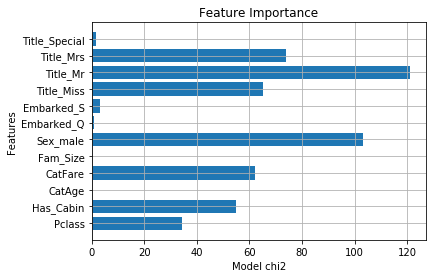

In [199]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_smt, y_smt)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_*100)

# horizontal bar plot of feature importance
pos = np.arange(12) + 0.5
plt.barh(pos, fit.scores_, align='center')
plt.title("Feature Importance")
plt.xlabel("Model chi2")
plt.ylabel("Features")
plt.yticks(pos, ('Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Special'))
plt.grid(True)

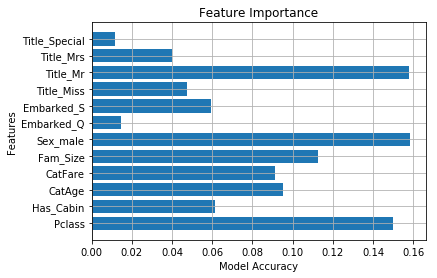

In [200]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X_smt, y_smt)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(12) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Special'))
plt.grid(True)

Feature ranking:
1. feature 9 (0.192635)
2. feature 5 (0.143133)
3. feature 0 (0.121750)
4. feature 4 (0.113558)
5. feature 2 (0.097592)
6. feature 3 (0.095702)
7. feature 1 (0.069537)
8. feature 7 (0.050640)
9. feature 10 (0.042795)
10. feature 8 (0.040183)
11. feature 11 (0.017115)
12. feature 6 (0.015359)


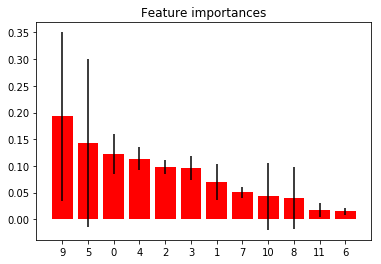

In [201]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_smt, y_smt)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_smt.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_smt.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_smt.shape[1]), indices)
plt.xlim([-1, X_smt.shape[1]])
plt.show()

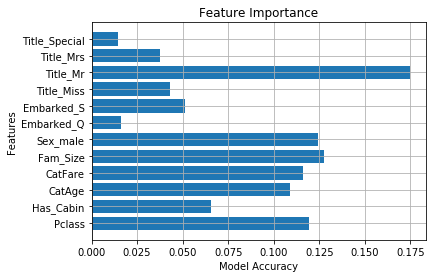

In [202]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forest = RFC()
forest.fit(X_smt, y_smt)
importances = forest.feature_importances_


# horizontal bar plot of feature importance
pos = np.arange(12) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Special'))
plt.grid(True)

In [119]:
# Data Final : df_balanceado_smt pueden elegir cualquiera resultado del producto de un método de balanceo
import pandas as pd
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt

In [203]:
# ESTA ES LA PARTE MAS IMPORTANTE DE MODELAR
# Creamos la matriz de variables independientes X (VI)y el vector columna de VD loan_Amount_Log no son relevantes por ende 
# podemos prescindir de alguna de ellas
# Pudimos observar en el feature selection que las variables Loan_Amount_Term y LoanAmount_Log
df_balanceado_smt2 = df_balanceado_smt[['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Special', 'Survived']]#,df_balanceado_smt['Loan_Status'] #Axis = 1 por columnas

In [204]:
# Creación de la data de train, separando o haciendo un split de nuestra información
X_train =df_balanceado_smt2.drop('Survived',axis=1)
y_train = df_balanceado_smt2['Survived']

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression()
lr.fit(X_train, y_train) # Entrenamiento del modelo

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [206]:
y_pred=lr.predict(X_test) # Prediccion sobre el test

In [207]:
#Atributos
#lr.coef_ 
#lr.score(X, y)

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.825

	Precision: 0.787
	Recall: 0.780
	F1: 0.783



In [208]:
# Selección de Drivers Paramétricos (Prueba para observar la salida)

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True False  True  True  True  True  True  True]
[1 1 2 1 1 3 1 1 1 1 1 1]


In [209]:
X_train_lr = X_train[['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Special']]
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_lr)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.411513
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  774
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                           11
Date:                Sun, 23 Sep 2018   Pseudo R-squ.:                  0.4063
Time:                        23:24:47   Log-Likelihood:                -318.51
converged:                       True   LL-Null:                       -536.50
                                        LLR p-value:                 1.391e-86
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pclass           -0.4556      0.205     -2.227      0.026      -0.857      -0.055
Has_Cabin         0.

In [210]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
lr = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.810


In [211]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.86      0.85       159
          1       0.79      0.78      0.78       109

avg / total       0.82      0.82      0.82       268



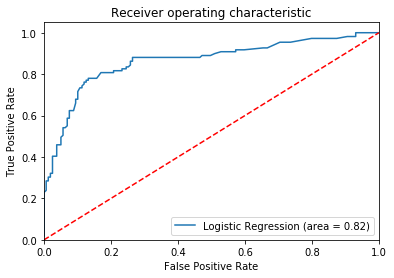

In [212]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression()
lr.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [213]:
X_train.head(5)

,Pclass,Has_Cabin,CatAge,CatFare,Fam_Size,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3.0,0.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [214]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
#test_1 = pd.read_csv("./dataset/test.csv") 
#df_test = test_1.copy()
test_parametrica.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Embarked', 'Title', 'Has_Cabin',
       'CatAge', 'CatFare', 'Fam_Size'],
      dtype='object')

In [225]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
data_dum_test.columns
df2 = data_dum_test.copy()
df2=df2[['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Special']]

In [226]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = lr.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

In [231]:
data = np.hstack((data_dum_test['PassengerId'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['PassengerId','Survived'])
df_submmit.to_csv('Logistica0001.csv', index=False)

##### Modelos Supervisados : KNN

In [232]:
from sklearn.neighbors import KNeighborsClassifier
# Cuando utilizo p=1 Manhathan, p=2 Euclídea 
neigh = KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree',p=2)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [233]:
#Atributos
#lr.coef_ 
#lr.score(X, y)

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.825

	Precision: 0.787
	Recall: 0.780
	F1: 0.783



In [234]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
knn = KNeighborsClassifier(n_neighbors=30,algorithm='kd_tree',p=2)
scoring = 'accuracy'
results = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.793


In [235]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.86      0.85       159
          1       0.79      0.78      0.78       109

avg / total       0.82      0.82      0.82       268



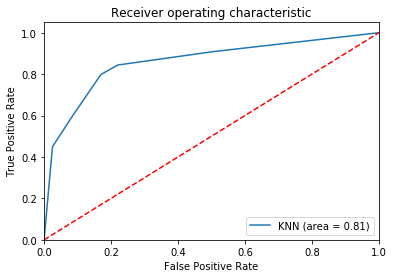

In [236]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [238]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
data_dum_test.columns
df2 = data_dum_test.copy()
df2=df2[['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Special']]

In [239]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = neigh.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((data_dum_test['PassengerId'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['PassengerId','Survived'])
df_submmit.to_csv('KNN0001.csv', index=False)

#### Modelos Supervisados : Naive Bayes

In [240]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

NB = GaussianNB()
NB.fit(X_train, y_train)
GaussianNB(priors=None)

GaussianNB(priors=None)

In [241]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = NB.predict(X_test)

In [242]:
#Atributos
#lr.class_prior_ ,class_count_ ,theta_ sigma_ 

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.772

	Precision: 0.722
	Recall: 0.716
	F1: 0.719



In [243]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
NB = GaussianNB()
scoring = 'accuracy'
results = model_selection.cross_val_score(NB, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.783


In [244]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.81      0.81       159
          1       0.72      0.72      0.72       109

avg / total       0.77      0.77      0.77       268



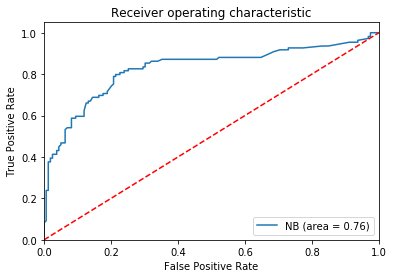

In [245]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

NB = GaussianNB()
NB.fit(X_train, y_train)

knn_roc_auc = roc_auc_score(y_test, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

In [246]:
from sklearn.tree import DecisionTreeClassifier
#Parámetros del árbol de clasificación
# criterion  , splitter ,max_depth,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,splitter
arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt',max_depth=20)
arb.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [247]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = arb.predict(X_test)

In [248]:
#Atributos
#arb.classes_ ,feature_importances_ ,max_features_ ,tree_ 

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.802

	Precision: 0.792
	Recall: 0.697
	F1: 0.741



In [249]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt')
scoring = 'accuracy'
results = model_selection.cross_val_score(arb, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.795


In [250]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.87      0.84       159
          1       0.79      0.70      0.74       109

avg / total       0.80      0.80      0.80       268



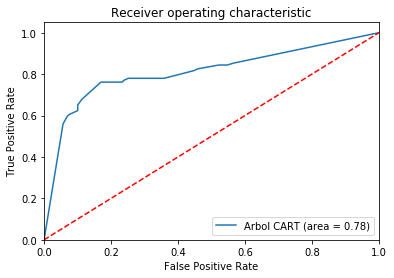

In [251]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt')
arb.fit(X_train, y_train)

arbol_roc_auc = roc_auc_score(y_test, arb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, arb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Arbol CART (area = %0.2f)' % arbol_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Arbol_CART_ROC')
plt.show()

In [252]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
data_dum_test.columns
df2 = data_dum_test.copy()
df2=df2[['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Special']]

In [254]:
y_final = lr.predict(df2)

#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = arb.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((data_dum_test['PassengerId'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['PassengerId','Survived'])
df_submmit.to_csv('Titanic_Arbolito.csv', index=False)

In [255]:
# Si deseamos mejorar nuestro Arbol de Clasificación, podemos hacer un tunning de parámetros
# Podemos comenzar calibrando alguno de los parámetros, por ejemplo 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, cv=5, refit='AUC')

gs.fit(X_train, y_train)
results = gs.cv_results_

C:\Users\jean\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\jean\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_AUC'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\jean\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_AUC'), which will not be available by default any more in 0.21. If you need training score

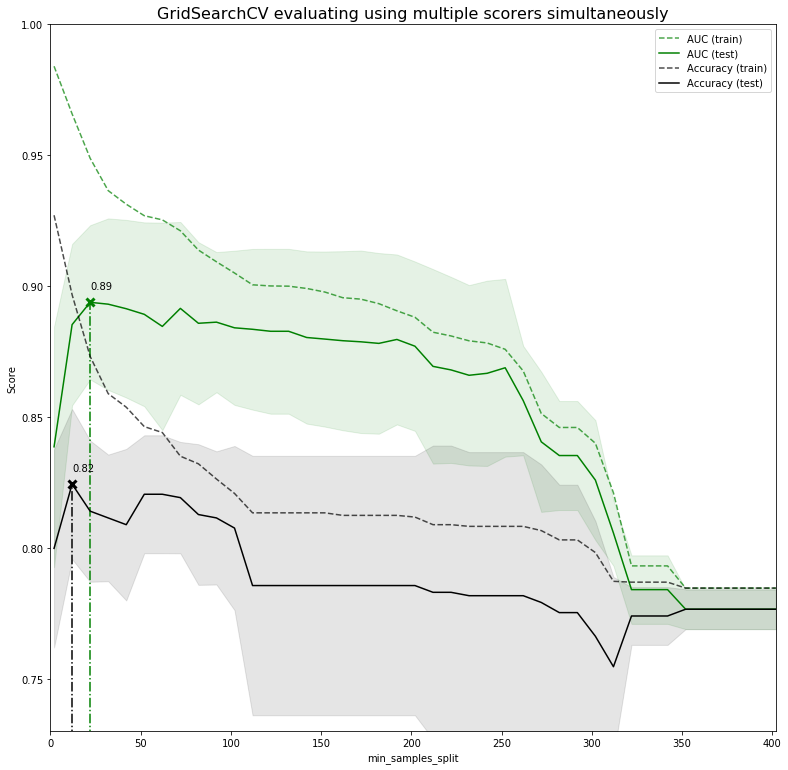

In [256]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [257]:
from sklearn import svm
# Parámetros disponibles:
# Kernel disponibles en Python ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ 
# degree : Opcional , por defecto 3,se usa para el Kernel Polinomial.
# gamma : Coeficiente de Kernel para 'rbf', 'poly' y 'sigmoid'. Si gamma es 'auto', entonces se usarán 1 / n° features en su lugar.
# shrinking : Contracción de parámetros, por defecto es T
# tol : Tolerancia para el criterio de parada.
# random_state : Semilla aleatoria 
# Demora así que tener cuidado
C = 1.0  # parametro de regulacion SVM 
svc = svm.SVC(kernel='linear', C=C)
#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)
#svmkl=svm.SVC(kernel="linear", C=0.025)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [258]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = svc.predict(X_test)

In [259]:
#Atributos
#arb.classes_ ,feature_importances_ ,max_features_ ,tree_ 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.832

	Precision: 0.820
	Recall: 0.752
	F1: 0.785



In [260]:
# Dejarlo correr con tiempo, aprox 6 minutos
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=2, random_state=7)
svc = svm.SVC(kernel='linear', C=1)
scoring = 'accuracy' # Podemos también cambiar la métrica , por ejemplo :
# ‘accuracy’ ‘average_precision’ ‘f1’ ‘precision’ ‘recall’
results = model_selection.cross_val_score(svc, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.784


In [261]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.89      0.86       159
          1       0.82      0.75      0.78       109

avg / total       0.83      0.83      0.83       268



In [262]:
from sklearn.ensemble import RandomForestClassifier
# Parámetros  :
# max_features : None ,'sqrt',%X
# n_estimators  : Número de árboles a utilizar
# min_sample_leaf : Tamaño mínimo de elementos en hojas terminales (Nodos hijos)
# random_state : Semilla aleatoria
# oob_score : Error fuera de bolsa
#rf = RandomForestClassifier(max_features=4 , n_estimators=200,oob_score=True,max_depth=2)
rf = RandomForestClassifier(max_features=7,n_estimators=500,oob_score=True,max_depth=10,
                            min_samples_leaf=30)
rf.fit(X_train, y_train) # Entrenando un algoritmo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [263]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = rf.predict(X_test)

In [264]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.817

	Precision: 0.800
	Recall: 0.734
	F1: 0.766



In [265]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
# Probar con diferentes parámetros de min_samples_leaf = 20
kfold = model_selection.KFold(n_splits=10, random_state=7)
rf = RandomForestClassifier(max_features='sqrt', n_estimators=500,oob_score=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.814


In [266]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.87      0.85       159
          1       0.80      0.73      0.77       109

avg / total       0.82      0.82      0.82       268



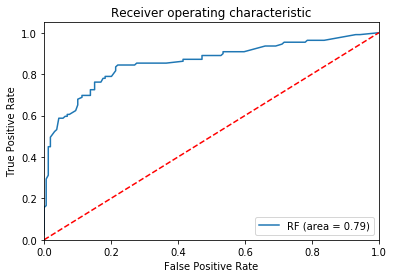

In [267]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

rf = RandomForestClassifier(max_features=5 , n_estimators=200,oob_score=True,max_depth=2)
rf.fit(X_train, y_train)

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()

In [268]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
data_dum_test.columns
df2 = data_dum_test.copy()
df2=df2[['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Special']]

In [269]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
y_final = rf.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

In [271]:
data = np.hstack((data_dum_test['PassengerId'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['PassengerId','Survived'])
df_submmit.to_csv('RandomForest.csv', index=False)

#### Ada Boost

In [272]:
from sklearn.ensemble import AdaBoostClassifier
# Parámetros :
# base_estimator : Es el estimador base sobre la cual el ensamble es constuido.
# n_estimators : Numero de estimadores con los cuales se construye el ensamble.
# random_state : semilla aleatoria
AdaBoost=AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
AdaBoost.fit(X_train, y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=100, random_state=None)

In [273]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = AdaBoost.predict(X_test)

In [274]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.799

	Precision: 0.767
	Recall: 0.725
	F1: 0.745



In [275]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=20, random_state=7)
AdaBoost=AdaBoostClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(AdaBoost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.830


In [276]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83       159
          1       0.77      0.72      0.75       109

avg / total       0.80      0.80      0.80       268



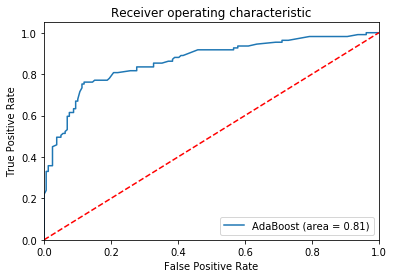

In [277]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

AdaBoost=AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)

AdaBoost_roc_auc = roc_auc_score(y_test, AdaBoost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, AdaBoost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % AdaBoost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AdaBoost_ROC')
plt.show()

In [278]:
data_dum_test.columns
df2 = data_dum_test.copy()
df2=df2[['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Special']]

In [279]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = AdaBoost.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

In [280]:
data = np.hstack((data_dum_test['PassengerId'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['PassengerId','Survived'])
df_submmit.to_csv('Submmit_AdaBoost_001.csv', index=False)

#### GBM

In [281]:
from sklearn import ensemble

params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.70,
          'learning_rate': 0.01, 'min_samples_leaf': 20, 'random_state': 3}
Gboost = ensemble.GradientBoostingClassifier(**params)
Gboost.fit(X_train, y_train) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1200,
              presort='auto', random_state=3, subsample=0.7, verbose=0,
              warm_start=False)

In [282]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_final = Gboost.predict(X_test)

In [284]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.799

	Precision: 0.767
	Recall: 0.725
	F1: 0.745



In [285]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
Gboost = ensemble.GradientBoostingClassifier(**params)
scoring = 'accuracy'
results = model_selection.cross_val_score(Gboost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.841


In [286]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83       159
          1       0.77      0.72      0.75       109

avg / total       0.80      0.80      0.80       268



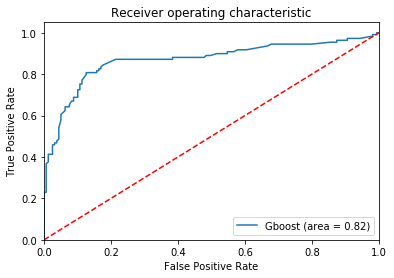

In [287]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

Gboost = ensemble.GradientBoostingClassifier(**params)
Gboost.fit(X_train, y_train)

Gboost_roc_auc = roc_auc_score(y_test, Gboost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Gboost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gboost (area = %0.2f)' % Gboost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gboost_ROC')
plt.show()

In [288]:
df2 = data_dum_test.copy()
df2=df2[['Pclass', 'Has_Cabin', 'CatAge', 'CatFare', 'Fam_Size',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Special']]

In [289]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = Gboost.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

In [291]:
data = np.hstack((data_dum_test['PassengerId'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['PassengerId','Survived'])
df_submmit.to_csv('GBM_001.csv', index=False)